In [1]:
import reXplan as rx
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter("ignore") # warning are ignored for now

Unable to determine R home: [WinError 2] The system cannot find the file specified


In [2]:
simulationName = 'strata_example'
network = rx.network.Network(simulationName)
simulation = rx.simulation.Sim(simulationName)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

start= 1, stop= 41
start= 12, stop= 17


In [ ]:
ref_return_period = 'rp6'
out_db = simulation.initialize_model_rp(network=network,
                               ref_return_period=ref_return_period,
                               iterationNumber=1,
                               maxTotalIteration=50,
                               cv=0.1,
                               #x_min=0.5,
                               #x_max=2
                                )

In [3]:
#
df=simulation.run(network, iterationSet = [4,5], time = None, run_type = 'ac_opf', delta = 1e-16, saveOutput = False)
#df[0][0].xs('TR1', level='id', axis=1, drop_level=True)
df

  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

Strata = 2; Iteration = 4


Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
 30%|████████████████████████▌                                                         | 12/40 [00:07<00:16,  1.67it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
Multiple connected slacks in one area found. This 

Strata = 2; Iteration = 5



  5%|████▏                                                                              | 2/40 [00:00<00:10,  3.59it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.

  8%|██████▏                                                                            | 3/40 [00:01<00:14,  2.63it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.

 10%|████████▎                                                                          | 4/40 [00:01<00:17,  2.12it/s]Multiple connected slacks in one area found. This would probably lead to non-convergen

2022-01-01 01:00:00  \
strata iteration field                     type    id                           
2      4         p_mw                      bus     bus1           -324.843927   
                                                   bus10             0.000000   
                                                   bus11           -56.859856   
                                                   bus12             0.000000   
                                                   bus13             0.000000   
...                                                                       ...   
       5         energy_not_served_mwh     network                   0.000000   
                 loss_of_load_p_duration_h network                   0.000000   
                 loss_of_load_p_mw         network                   0.000134   
                 loss_of_load_p_percentage network                   0.000020   
                 in_service                trafo   TR1               1.000000   

                                                          2022-01-01 02:00:00  \
strata iteration field                     type    id                           
2      4         p_mw                      bus     bus1           -202.687603   
                                                   bus10             0.000000   
                                                   bus11           -28.738317   
                                                   bus12             0.000000   
                                                   bus13             0.000000   
...                                                                       ...   
       5         energy_not_served_mwh     network                   0.000000   
                 loss_of_load_p_duration_h network                   0.000000   
                 loss_of_load_p_mw         network                   0.000448   
                 loss_of_load_p_percentage network                   0.000099   
                 in_service                trafo   TR1               1.000000   

                                                          2022-01-01 03:00:00  \
strata iteration field                     type    id                           
2      4         p_mw                      bus     bus1           -171.436260   
                                                   bus10             0.000000   
                                                   bus11           -10.196970   
                                                   bus12             0.000000   
                                                   bus13             0.000000   
...                                                                       ...   
       5         energy_not_served_mwh     network                   0.000000   
                 loss_of_load_p_duration_h network                   0.000000   
                 loss_of_load_p_mw         network                   0.001002   
                 loss_of_load_p_percentage network                   0.000266   
                 in_service                trafo   TR1               1.000000   

                                                          2022-01-01 04:00:00  \
strata iteration field                     type    id                           
2      4         p_mw                      bus     bus1           -253.334032   
                                                   bus10             0.000000   
                                                   bus11            -5.910928   
                                                   bus12             0.000000   
                                                   bus13             0.000000   
...                                                                       ...   
       5         energy_not_served_mwh     network                   0.000000   
                 loss_of_load_p_duration_h network                   0.000000   
                 loss_of_load_p_mw         network                   0.000161   
     

In [4]:
simulation.stratResults

TypeError: object of type 'NoneType' has no len()

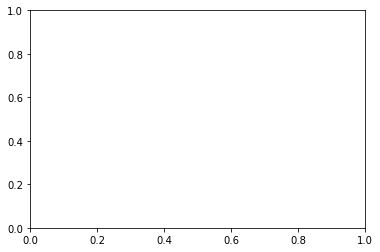

In [5]:
plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

In [ ]:
df = simulation.failureProbs[simulation.failureProbs['element type']=='Line']
sns.lineplot(data=df, x='event intensity', y='failure probability', hue='power element')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
for rp in network.returnPeriods.keys():
    sns.lineplot(x=network.returnPeriods[rp].x_data, y=network.returnPeriods[rp].y_data)

In [ ]:
fc = 'towers_1'
rp = 'rp6'

x = network.fragilityCurves[fc].x_data

sns.lineplot(x=x, y=network.fragilityCurves[fc].y_data)
sns.lineplot(x=x, y=network.fragilityCurves[fc].projected_fc(rp=network.returnPeriods[rp], ref_rp=network.returnPeriods[ref_return_period], xnew=x))

In [ ]:
simulation.failureProbs[(simulation.failureProbs['element type']=='Generator') & (simulation.failureProbs['iteration']==4)]